# Criando uma apresentação executiva
- Vamos usar a base de vendas do kaggle disponível em:
    - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

### O que queremos responder?
- Como foi a **venda** nesse período?
- Qual foi a **categoria mais vendida**?
- Qual foi o **item mais vendido**?


In [79]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Importando e visualizando a base
- Base: "Criando uma apresentação executiva.csv"

In [80]:
# Importando a base
base_df = pd.read_csv("Criando uma apresentação executiva.csv")
base_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


### 2. Entendendo e tratando a base

In [81]:
# Visualizando as informações da base
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**Apenas código postal possui valores nulos, podemos visualizar quais linhas não possuem esse valor**

In [82]:
# Verificando os registros com Postal Code vazio
base_df.loc[(base_df['Postal Code']).isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**Todos os registros sem código postal são da cidade de Burlington, em Vermont. Será que algum registro dessa cidade possui código postal?**

In [83]:
# Verificando se existe algum registro de Burlington, Vermont com Postal Code
base_df.loc[(base_df.City == 'Burlington') & (base_df.State == 'Vermont') & (base_df['Postal Code']).notnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


**Podemos ir diretamente no google para buscar essa informação**

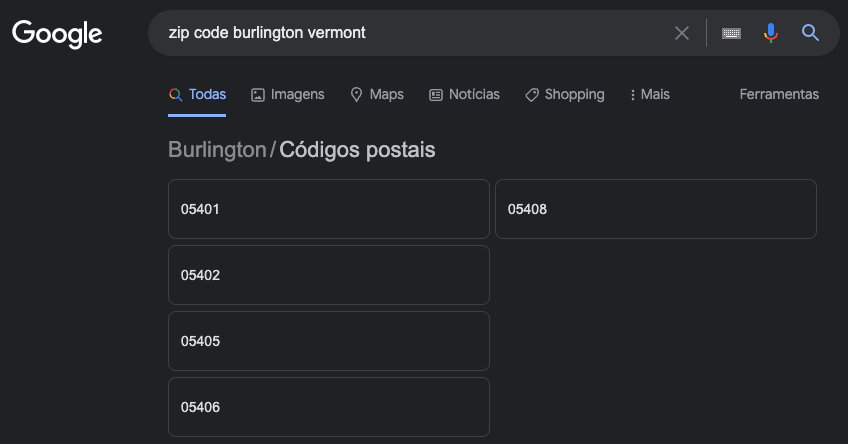

In [84]:
# Atualizando essa informação
base_df.loc[(base_df.City == 'Burlington') & (base_df.State== 'Vermont'), 'Postal Code'] = 5041

In [85]:
# Verificando se ainda existe algum valor nulo
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [86]:
# Visualizando novamente as informações da base
base_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


### 3. <font color="blue"> Como foi a venda nesse período? </font>
Aqui temos 2 questões que precisamos pensar:
- **Quais <font color="blue">colunas</font> vamos usar?**
    - Podemos verificar a venda na coluna "Sales""
    - O período nós podemos usar a coluna "Order Date", mas precisamos entender melhor essa coluna
- **Qual o <font color="blue">período</font> queremos exibir?**

In [87]:
# Para entender a data, podemos ver de qual período estamos falando
base_df['Order Date'].min()

'01/01/2018'

**<font color="red">CUIDADO:</font> Se a coluna de data estiver como texto e não como data, a ordenação vai ser pelo texto e não pela data!**

**Podemos converter uma coluna para data usando o to_datetime do pandas**
<br><br>
base["coluna"] = pd.**to_datetime(**base["coluna"]**)**
- No datetime, caso tenha apenas a data, a hora ficaria como 00:00:00
- Se quisermos considerar apenas a data, podemos usar o **.date** da biblioteca **datetime**

In [88]:
# Convertendo as colunas de data para datetime
base_df['Order Date'] = pd.to_datetime(base_df['Order Date'], format='%d/%m/%Y')
base_df['Ship Date'] = pd.to_datetime(base_df['Ship Date'], format='%d/%m/%Y')

In [89]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [90]:
# Para entender a data, podemos ver de qual período estamos falando
base_df['Order Date'].min()

Timestamp('2015-01-03 00:00:00')

In [91]:
# Buscando o máximo da data
base_df['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

- Estamos falando de 4 anos de análise, começando em jan/2015 e indo até dez/2018

#### Como estamos falando de um período grande de anos, podemos começar a visualização pelos anos
- Para isso, podemos usar o **.year** da biblioteca datetime para criar uma nova coluna apenas com o ano dessa base

# Venda por ano

In [92]:
# Criando uma coluna com o ano
base_df['Ano'] = base_df['Order Date'].dt.year


In [93]:
base_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016


#### Lembram do groupby()?

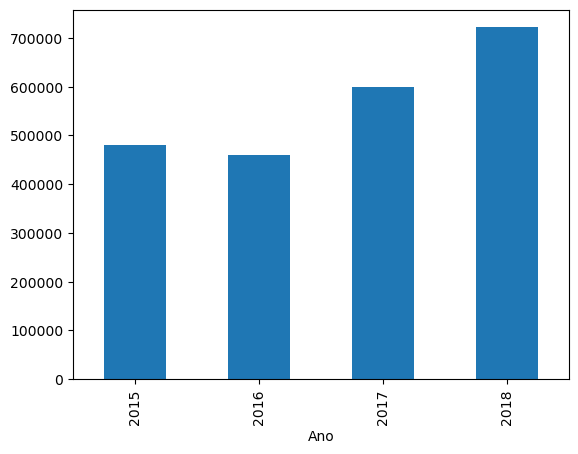

In [94]:
# Usando essa coluna no group by e criando um plot de barras
base_df.groupby('Ano')['Sales'].sum().plot.bar();

## Melhorando o visual desse gráfico
- Como já vimos no último tópico, podemos melhorar muito a visualização desse gráfico. Vamos fazer isso!
- Primeiramente vamos traçar um gráfico usando o que aprendemos de matplotlib
    - https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py
    - Sugestão de cor: `#84ba5b`

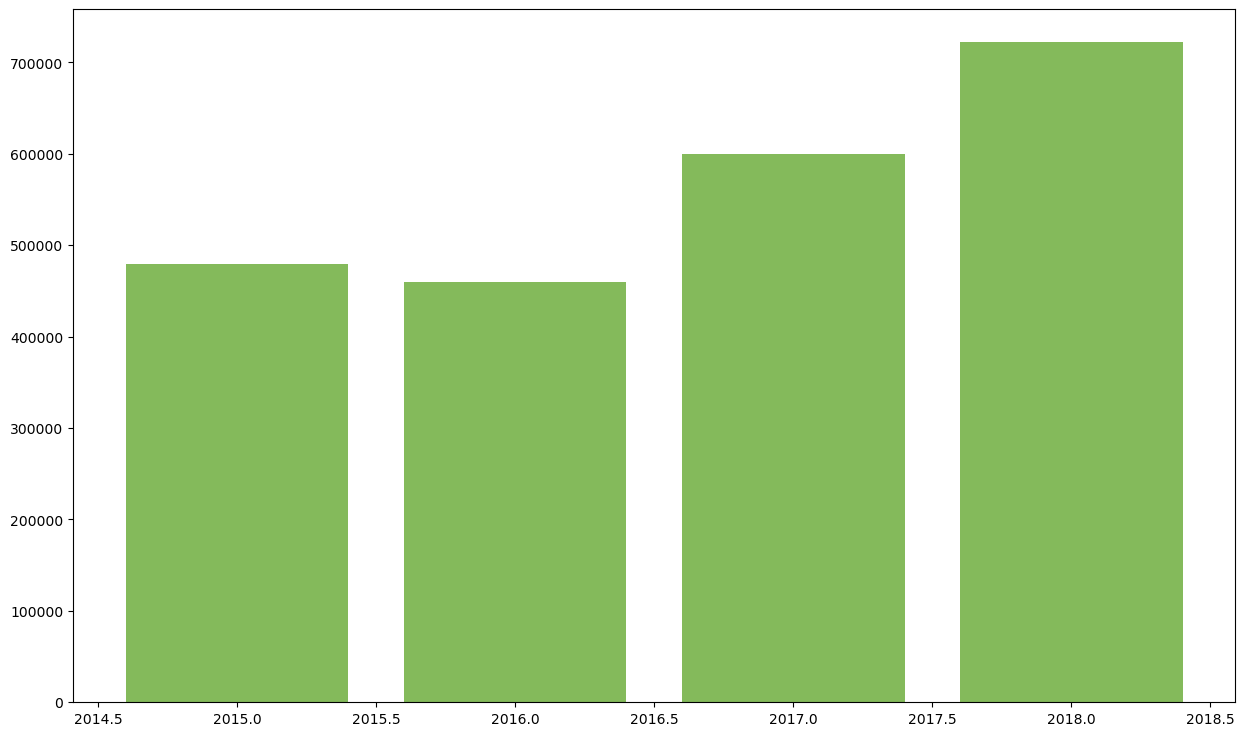

In [95]:
# Criando um gráfico com o matplotlib usando o groupby
figura, ax = plt.subplots(
    figsize=(15, 9) #tamanho da figura
)

vendas_ano = base_df.groupby("Ano")['Sales'].sum() #valores usados para fazer o gráfico

ax.bar(vendas_ano.index, vendas_ano.values, color='#84ba5b')
plt.show()

**Adicionando o título e melhorando os textos do eixo**
- Vamos adicionar o título e melhorar o eixo x
    - O `.set_title` vai permitir colocar título e ajustar os parâmetros desse títulos
        - fontsize: Tamanho da fonte
        - fontweight: Espessura da fonte
        - color: Cor da fonte
    - O `xaxis.set_ticks` vai definir os valores mostrados no eixo x
    - O `.tick_params(axis='x')` vai ajustar o parâmetro do eixo x
        - labelsize: tamanho do label

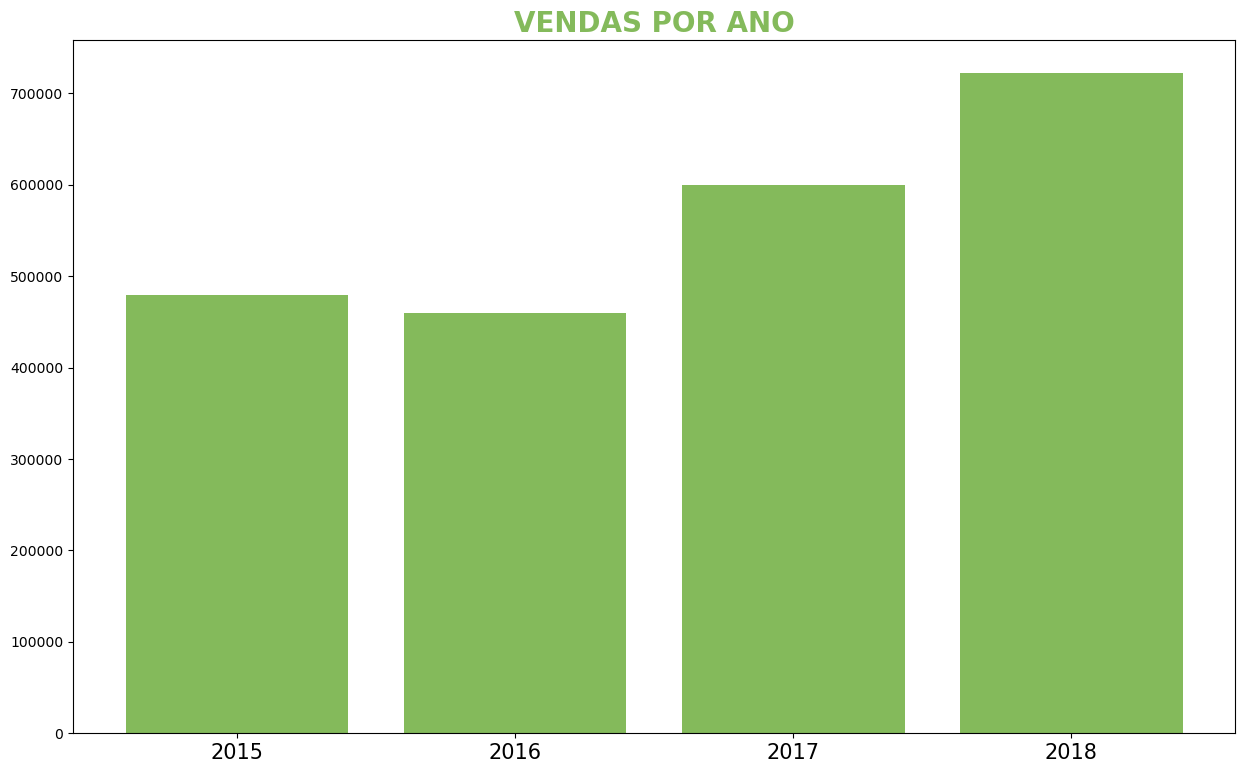

In [96]:
figura, ax = plt.subplots(
    figsize=(15, 9) #tamanho da figura
)

vendas_ano = base_df.groupby("Ano")['Sales'].sum() #valores usados para fazer o gráfico

ax.bar(vendas_ano.index, vendas_ano.values, color='#84ba5b')
ax.set_title('VENDAS POR ANO', #titulo
            fontsize=20, #tamanho da fonte
            fontweight='bold', #espessura da fonte
            color='#84ba5b') #cor do título

ax.set_xticks(range(2015, 2019)) #ajustando os valores em x

ax.tick_params(axis='x', labelsize=15) #melhorando o visual do eixo x
plt.show()

**Adicionando o rótulo de dados**
- Para adicionar rótulo de dados, vamos usar o `.annotate` como vimos na última aula

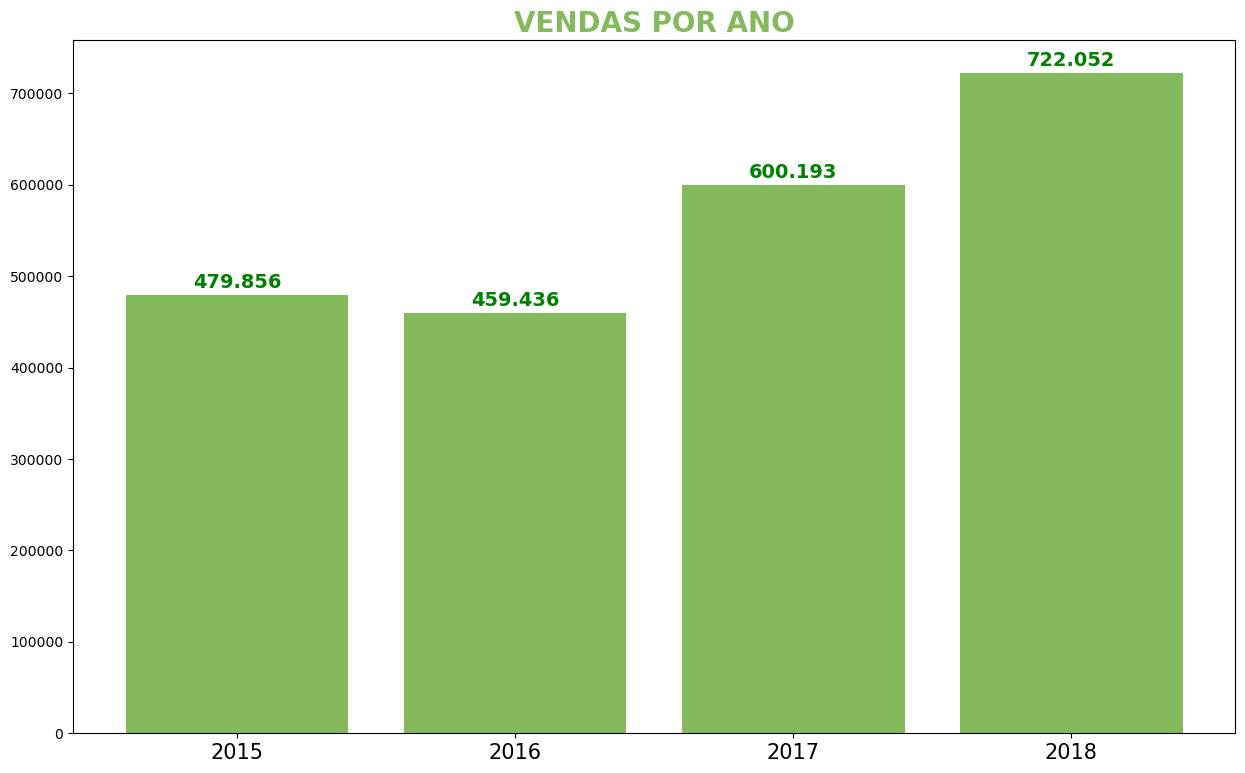

In [97]:
figura, ax = plt.subplots(
    figsize=(15, 9) #tamanho da figura
)

vendas_anos = base_df.groupby("Ano")['Sales'].sum() #valores usados para fazer o gráfico

ax.bar(vendas_ano.index, vendas_ano.values, color='#84ba5b')
ax.set_title('VENDAS POR ANO', #titulo
            fontsize=20, #tamanho da fonte
            fontweight='bold', #espessura da fonte
            color='#84ba5b') #cor do título

for i in range(4):
    ax.annotate(f'{vendas_ano.values[i]:,.0f}'.replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
               (vendas_ano.index[i], vendas_ano.values[i]), # Posição (x,y que esses valores vão estar)
               ha='center',  # Alinhamento horizontal do texto
               xytext=(0, 5),  # Deslocamento em relação ao ponto que o texto estaria
               textcoords='offset points',   # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)    
               fontsize=14, # Tamanho da fonte dos rótulos
               fontweight='bold', # Espessura da fonte dos rótulos
               color="green") # Cor dos rótulos

ax.set_xticks(range(2015, 2019)) #ajustando os valores em x

ax.tick_params(axis='x', labelsize=15) #melhorando o visual do eixo x
plt.show()

**Melhorando a visualização do gráfico**
- Para o eixo y, podemos fazer igual fizemos para o eixo x
    - Com o `.set_yticks` vamos ajustar os valores do eixo y
    - O `.yaxis.set_visible(False)` permite retirar os valores do eixo y, tornando nosso visual mais claro
- Já para retirar as bordas do gráfico, basta usar o `.spines['top'].set_visible(False)`

**Como resultado final, teremos o gráfico abaixo**

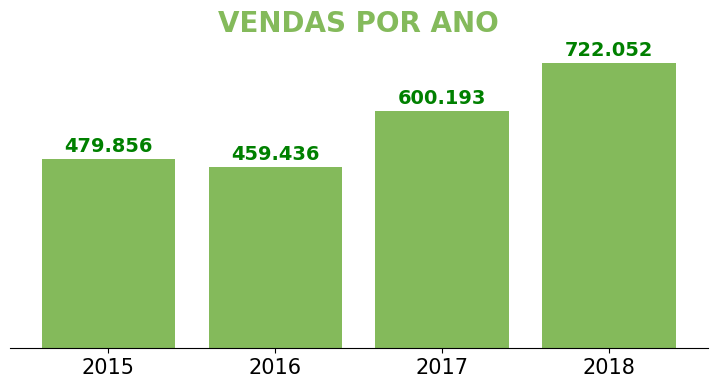

In [98]:
figura, ax = plt.subplots(
    figsize=(9, 4) #tamanho da figura
)

vendas_ano = base_df.groupby("Ano")['Sales'].sum() #valores usados para fazer o gráfico

ax.bar(vendas_ano.index, vendas_ano.values, color='#84ba5b')
ax.set_title('VENDAS POR ANO', #titulo
            fontsize=20, #tamanho da fonte
            fontweight='bold', #espessura da fonte
            color='#84ba5b') #cor do título

for i in range(4):
    ax.annotate(f'{vendas_ano.values[i]:,.0f}'.replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
               (vendas_ano.index[i], vendas_ano.values[i]), # Posição (x,y que esses valores vão estar)
               ha='center',  # Alinhamento horizontal do texto
               xytext=(0, 5),  # Deslocamento em relação ao ponto que o texto estaria
               textcoords='offset points',   # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)    
               fontsize=14, # Tamanho da fonte dos rótulos
               fontweight='bold', # Espessura da fonte dos rótulos
               color="green") # Cor dos rótulos

ax.set_xticks(range(2015, 2019)) #ajustando os valores em x
ax.tick_params(axis='x', labelsize=15) #melhorando o visual do eixo x

ax.set_yticks([0, 780_000])
ax.yaxis.set_visible(False)
ax.spines[['top', 'right', 'left']].set_visible(False)
plt.show()

# Venda por mês

#### Também podemos mostrar essa visão por meses
- Para isso, podemos usar o **.month** da biblioteca datetime para criar uma nova coluna apenas com o mês dessa base

In [99]:
# Criando uma coluna com o mês
base_df['Mes'] = base_df['Order Date'].dt.month

In [100]:
base_df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


In [101]:
base_df[base_df['Customer ID'] == 'CG-12520']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,2017,11
5491,5492,CA-2018-164098,2018-01-26,2018-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,Texas,77070.0,Central,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",18.160,2018,1
6877,6878,US-2016-123918,2016-10-15,2016-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,Texas,75217.0,Central,FUR-FU-10004952,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder w/...,131.376,2016,10
6878,6879,US-2016-123918,2016-10-15,2016-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,Texas,75217.0,Central,OFF-PA-10003001,Office Supplies,Paper,Xerox 1986,5.344,2016,10


In [102]:
# Fazendo o groupby agora por mês e ano
soma_mes = base_df.groupby(['Ano', 'Mes'])['Sales'].sum()


In [103]:
soma_mes.head()

Ano   Mes
2015  1      14205.707
      2       4519.892
      3      55205.797
      4      27906.855
      5      23644.303
Name: Sales, dtype: float64

**Com o <font color="blue">.reset_index()</font> conseguimos transformar os índices em colunas e então aplicar todas as propriedades que conhecemos para o DataFrame**

In [104]:
# Vamos transformar os índices em colunas
soma_mes = soma_mes.reset_index()

In [105]:
# Visualizando a base novamente
soma_mes.head()

,Ano,Mes,Sales
0,2015,1,14205.707
1,2015,2,4519.892
2,2015,3,55205.797
3,2015,4,27906.855
4,2015,5,23644.303


In [106]:
soma_mes[soma_mes.Ano==2015]

,Ano,Mes,Sales
0,2015,1,14205.7070
1,2015,2,4519.8920
2,2015,3,55205.7970
3,2015,4,27906.8550
4,2015,5,23644.3030
5,2015,6,34322.9356
6,2015,7,33781.5430
7,2015,8,27117.5365
8,2015,9,81623.5268
9,2015,10,31453.3930


In [107]:
soma_mes[soma_mes.Ano==2015].Mes.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [108]:
soma_mes[soma_mes.Ano==2015].Sales.values

array([14205.707 ,  4519.892 , 55205.797 , 27906.855 , 23644.303 ,
       34322.9356, 33781.543 , 27117.5365, 81623.5268, 31453.393 ,
       77907.6607, 68167.0585])

In [109]:
soma_mes.loc[soma_mes.Ano == 2015, 'Mes'].index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

**Vamos usar o gráfico que fizemos na aula anterior para ir criando esse gráfico**

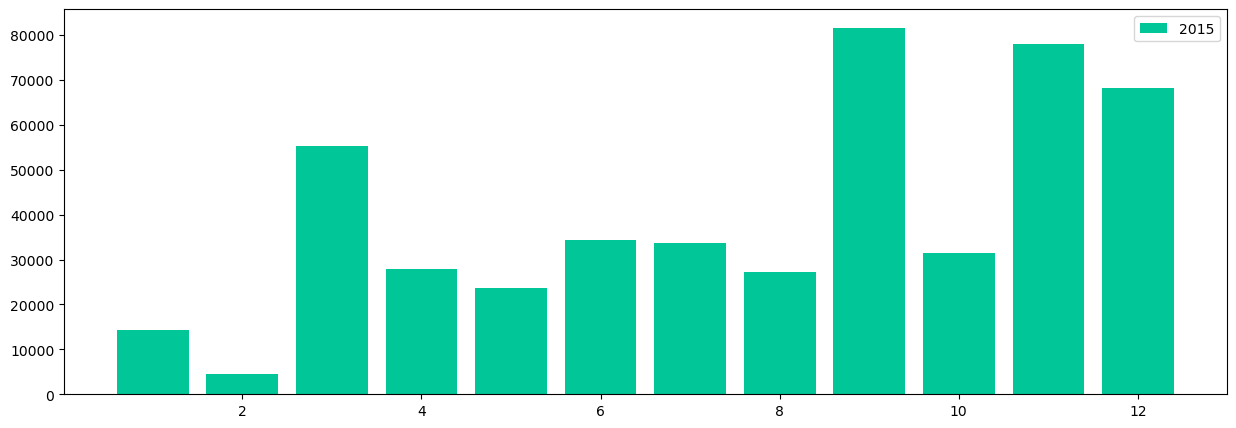

In [110]:
# Criando o gráfico de mês com o matplotlib
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(soma_mes[soma_mes.Ano==2015].Mes.values, 
       soma_mes[soma_mes.Ano==2015].Sales.values,
      color='#00c698',
      label=2015)

ax.legend()
plt.show()




**Agora vamos adicionar a barra do ano de 2016**
- Vamos adicionar um gráfico de barras com os dados de 2016

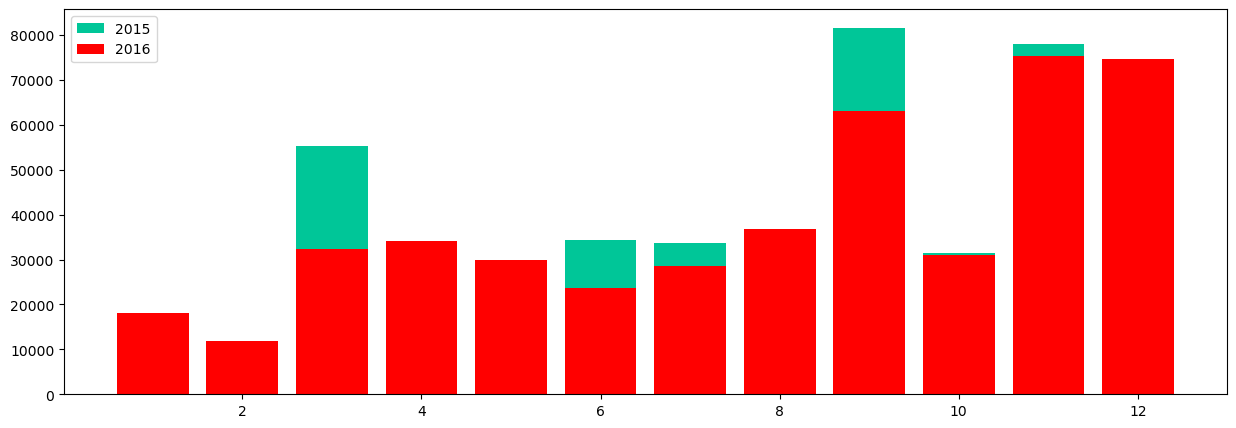

In [111]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(soma_mes[soma_mes.Ano== 2015].Mes.values,
       soma_mes[soma_mes.Ano==2015].Sales.values,
       label=2015,
      color='#00c698')

ax.bar(soma_mes[soma_mes.Ano==2016].Mes.values,
       soma_mes[soma_mes.Ano==2016].Sales.values,
      label=2016,
      color='red')

ax.legend()
plt.show()

**E então, deslocar as barras**
- Para isso, vamos usar o mesmo raciocínio do width que usamos na aula anterior
    - Para diferenciar os dados, também podemos usar o `label` para informar qual é cada um dos gráficos

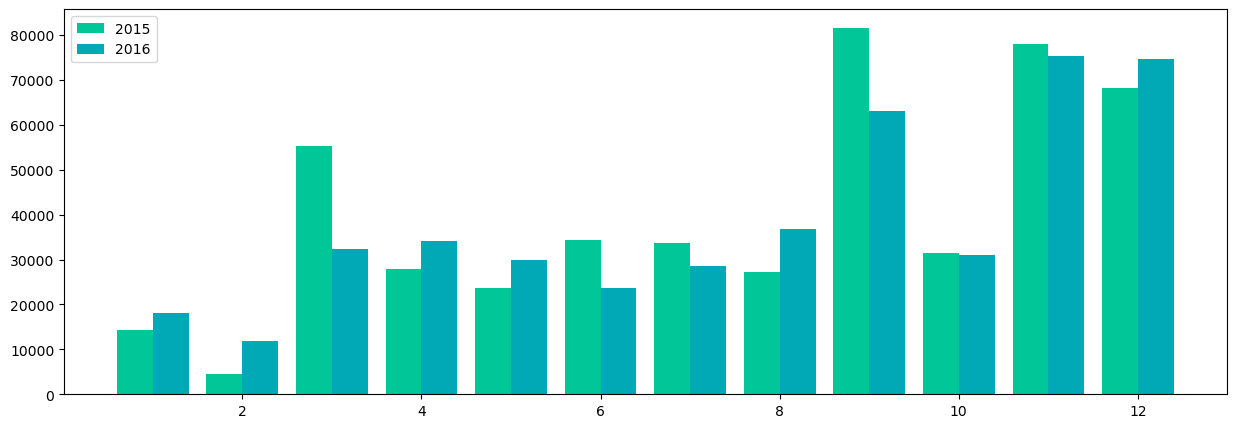

In [112]:
fig, ax = plt.subplots(figsize=(15, 5))

wid = 0.4

ax.bar(soma_mes[soma_mes.Ano== 2015].Mes.values - wid/2, #deslocando o gráfico para esquerda
       soma_mes[soma_mes.Ano==2015].Sales.values,
       label=2015,
      color='#00c698',
      width=wid)

ax.bar(soma_mes[soma_mes.Ano==2016].Mes.values + wid/2, #delocando o gráfico para a direita
       soma_mes[soma_mes.Ano==2016].Sales.values,
      label=2016,
      color='#00a9b5',
      width=wid)

ax.legend()
plt.show()

**Podemos agora adicionar todas as barras**

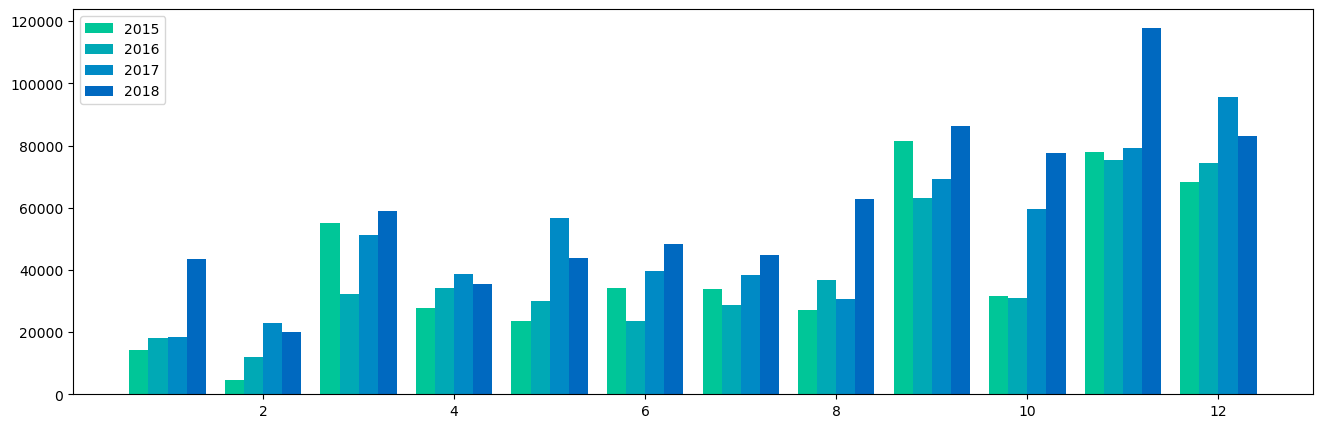

In [113]:
fig, ax = plt.subplots(figsize=(16, 5))

wid = 0.2

ax.bar(soma_mes[soma_mes.Ano== 2015].Mes.values - wid/2 - wid,
       soma_mes[soma_mes.Ano==2015].Sales.values,
       label=2015,
      color='#00c698',
      width=wid)

ax.bar(soma_mes[soma_mes.Ano==2016].Mes.values - wid/2,
       soma_mes[soma_mes.Ano==2016].Sales.values,
      label=2016,
      color='#00a9b5',
      width=wid)

ax.bar(soma_mes[soma_mes.Ano==2017].Mes.values + wid/2,
       soma_mes[soma_mes.Ano==2017].Sales.values,
       label=2017,
      color='#008ac5',
      width=wid)

ax.bar(soma_mes[soma_mes.Ano== 2018].Mes.values + wid +wid/2,
       soma_mes[soma_mes.Ano==2018].Sales.values,
       label=2018,
      color='#0069c0',
      width=wid)



ax.legend()
plt.show()

**E vamos colocar rótulo apenas em 2018 para não poluir muito o gráfico**

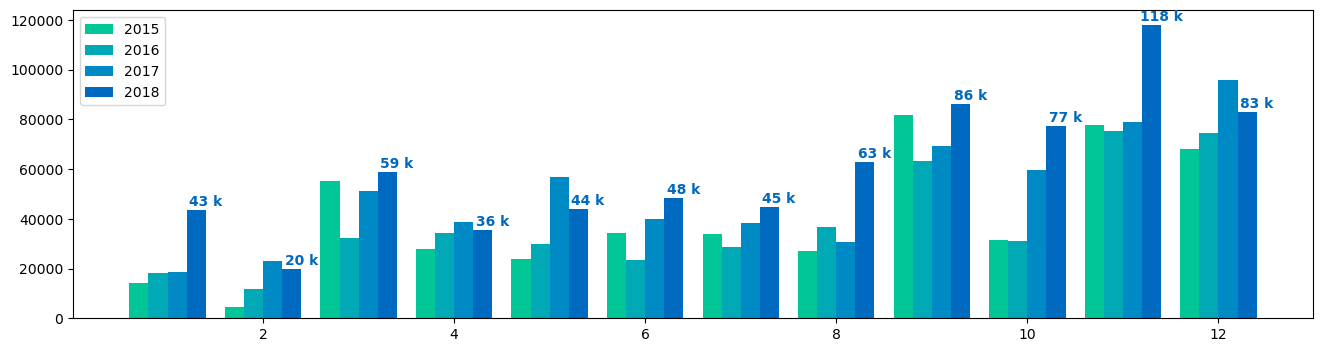

In [114]:
fig, ax = plt.subplots(figsize=(16, 4))

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano== 2015].Mes.values - wid/2 - wid,
       soma_mes[soma_mes.Ano==2015].Sales.values,
       label=2015,
      color='#00c698',
      width=wid)

ax.bar(soma_mes[soma_mes.Ano==2016].Mes.values - wid/2,
       soma_mes[soma_mes.Ano==2016].Sales.values,
      label=2016,
      color='#00a9b5',
      width=wid)

ax.bar(soma_mes[soma_mes.Ano==2017].Mes.values + wid/2,
       soma_mes[soma_mes.Ano==2017].Sales.values,
       label=2017,
      color='#008ac5',
      width=wid)

ax.bar(soma_mes[soma_mes.Ano== 2018].Mes.values + wid +wid/2,
       soma_mes[soma_mes.Ano==2018].Sales.values,
       label=2018,
      color='#0069c0',
      width=wid)
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in range(0, 12):
    ax.annotate(f'{soma_mes[soma_mes.Ano==2018].Sales.values[i] / 1000 :.0f} k', # Valores que vão ser mostrados como rótulos, já formatados
                 (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                xytext=(7,3), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
               )


plt.show()

**Melhorando o visual retirando as bordas e ajustando o texto do eixo x**

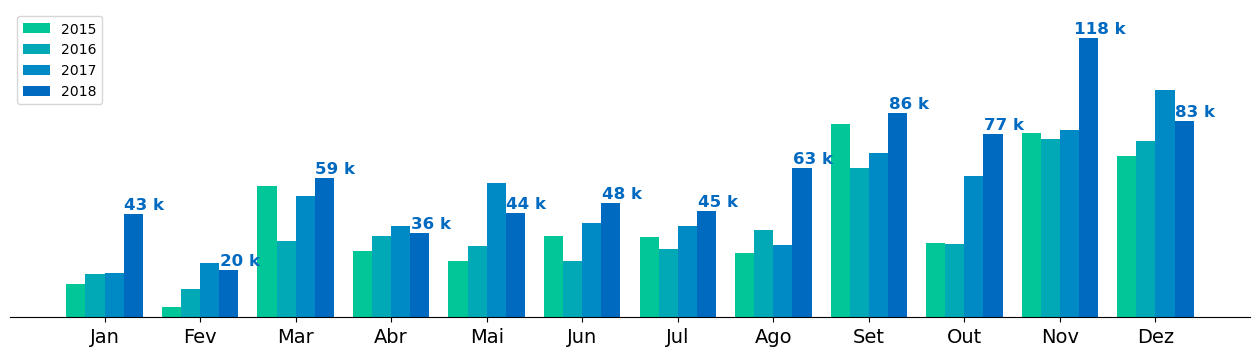

In [115]:
fig, ax = plt.subplots(figsize=(16, 4))

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano== 2015].Mes.values - wid/2 - wid,
       soma_mes[soma_mes.Ano==2015].Sales.values,
       label=2015,
      color='#00c698',
      width=wid)

ax.bar(soma_mes[soma_mes.Ano==2016].Mes.values - wid/2,
       soma_mes[soma_mes.Ano==2016].Sales.values,
      label=2016,
      color='#00a9b5',
      width=wid)

ax.bar(soma_mes[soma_mes.Ano==2017].Mes.values + wid/2,
       soma_mes[soma_mes.Ano==2017].Sales.values,
       label=2017,
      color='#008ac5',
      width=wid)

ax.bar(soma_mes[soma_mes.Ano== 2018].Mes.values + wid +wid/2,
       soma_mes[soma_mes.Ano==2018].Sales.values,
       label=2018,
      color='#0069c0',
      width=wid)
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in range(0, 12):
    ax.annotate(f'{soma_mes[soma_mes.Ano==2018].Sales.values[i] / 1000 :.0f} k', # Valores que vão ser mostrados como rótulos, já formatados
                 (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va='top',
                xytext=(8,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=12, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
               )

ax.set_yticks(np.array([0, 130_000])) #diminuindo o tamnho das barras para não cortar o rótulos
ax.yaxis.set_visible(False) #retirando os valores do eixo y

ax.set_xticks(np.arange(1, 13)) #ajustando os valores no eixo x

ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']) #colocando rótulo no eixo x
ax.tick_params('x', labelsize=14) #melhorando a visualização dos labels

ax.spines[['top', 'left', 'right']].set_visible(False) #retirando os traços do gráfico

plt.show()

### 4. <font color="blue"> Qual foi a categoria mais vendida? </font>
Precisamos primeiro entender a informação de categoria

In [116]:
base_df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,6


In [117]:
# Podemos fazer um groupby da categoria
base_df.groupby('Category')[['Sales']].sum()


,Sales
Category,
Furniture,728658.5757
Office Supplies,705422.3340
Technology,827455.8730


**Como estamos falando de 4 anos diferentes, seria interessante entender como foram essas categorias em cada um dos anos**

In [118]:
# Agrupando por ano e categoria
base_df.groupby(['Category', 'Ano'])[['Sales']].sum()


Sales
Category        Ano              
Furniture       2015  156477.8811
                2016  164053.8674
                2017  195813.0400
                2018  212313.7872
Office Supplies 2015  149512.8200
                2016  133124.4070
                2017  182417.5660
                2018  240367.5410
Technology      2015  173865.5070
                2016  162257.7310
                2017  221961.9440
                2018  269370.6910

**Uma forma de visualizar melhor essas informações é fazer um gráfico de barras com esses dados, bem semelhante ao que fizemos acima**

In [119]:
# Criando agora a base de categorias como fizemos anteriormente
categoria = base_df.groupby(['Category', 'Ano'])[['Sales']].sum()
categoria = categoria.reset_index()

In [120]:
# Visualizando 
categoria

,Category,Ano,Sales
0,Furniture,2015,156477.8811
1,Furniture,2016,164053.8674
2,Furniture,2017,195813.0400
3,Furniture,2018,212313.7872
4,Office Supplies,2015,149512.8200
5,Office Supplies,2016,133124.4070
6,Office Supplies,2017,182417.5660
7,Office Supplies,2018,240367.5410
8,Technology,2015,173865.5070
9,Technology,2016,162257.7310


In [121]:
categoria[categoria.Category=='Furniture'].Ano.values

array([2015, 2016, 2017, 2018], dtype=int64)

In [122]:
categoria[categoria.Category=='Furniture'].Sales.values

array([156477.8811, 164053.8674, 195813.04  , 212313.7872])

**Utilizando a mesma lógica do gráfico anterior**

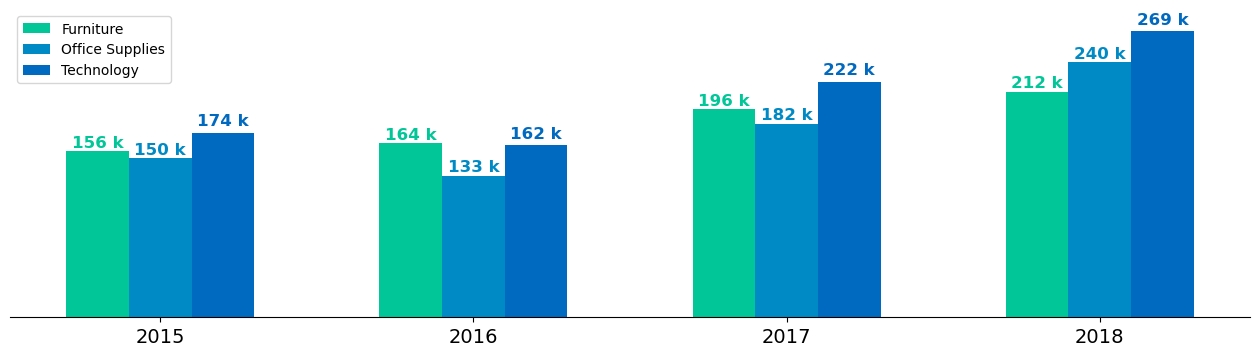

In [123]:
# Vamos utilizar o mesmo código do gráfico anterior para exibir por categorias

ig, ax = plt.subplots(figsize=(16, 4))

wid = 0.2 # Tamanho das barras

ax.bar(categoria[categoria.Category=='Furniture'].Ano.values - wid,
       categoria[categoria.Category=='Furniture'].Sales.values,
       label='Furniture',
      color='#00c698',
      width=wid)

ax.bar(categoria[categoria.Category=='Office Supplies'].Ano.values,
       categoria[categoria.Category=='Office Supplies'].Sales.values,
       label='Office Supplies',
      color='#008ac5',
      width=wid)

ax.bar(categoria[categoria.Category=='Technology'].Ano.values + wid,
       categoria[categoria.Category=='Technology'].Sales.values,
       label='Technology',
      color='#0069c0',
       
      width=wid)
ax.legend()
# Adicionando o rótulo dos dados para 2018
for i in range(0, 4):
    ax.annotate(f'{categoria[categoria.Category=="Furniture"].Sales.values[i] / 1000 :.0f} k', # Valores que vão ser mostrados como rótulos, já formatados
                 (categoria[categoria.Category=="Furniture"].Ano.values[i] - wid,categoria[categoria.Category=="Furniture"].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                xytext=(0,3), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=12, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#00c698" # Cor dos rótulos
               )
    ax.annotate(f'{categoria[categoria.Category=="Office Supplies"].Sales.values[i] / 1000 :.0f} k', # Valores que vão ser mostrados como rótulos, já formatados
                 (categoria[categoria.Category=="Office Supplies"].Ano.values[i] ,categoria[categoria.Category=="Office Supplies"].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                xytext=(0,3), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=12, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#008ac5" # Cor dos rótulos
               )
    ax.annotate(f'{categoria[categoria.Category=="Technology"].Sales.values[i] / 1000 :.0f} k', # Valores que vão ser mostrados como rótulos, já formatados
                 (categoria[categoria.Category=="Technology"].Ano.values[i] + wid,categoria[categoria.Category=="Technology"].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                xytext=(0,5), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=12, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
               )



ax.set_yticks(np.array([0, 290_000])) #diminuindo o tamnho das barras para não cortar o rótulos
ax.yaxis.set_visible(False) #retirando os valores do eixo y

ax.set_xticks(range(2015, 2019)) #colocando rótulo no eixo x
ax.tick_params('x', labelsize=14)  #melhorando a visualização dos labels

#retirando as traços do gráfico
ax.spines[['top', 'left', 'right']].set_visible(False)

plt.show()

### 5. <font color="blue"> Qual o item mais vendido? </font>
Vamos seguir exatamente a mesma lógica da categoria

**Podemos fazer a tabela considerando esses top itens**
- Para pegar uma base, podemos usar o `.head()` que já conhecemos
- Podemos também usar o `.sort_values()` para definirmos se a base será crescente ou descrescente

In [124]:
base_df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


In [125]:
# Podemos fazer um groupby do item
itens = base_df.groupby('Product Name')['Sales'].sum()
itens = itens.reset_index()
itens = itens.sort_values('Sales', ascending=False)
itens

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
...,...,...
97,Acme Serrated Blade Letter Opener,7.632
783,Grip Seal Envelopes,7.072
1792,Xerox 20,6.480
208,Avery 5,5.760


**Uma forma de resolver a quantidade de ítens seria fazer apenas para os top 10 ítens**

In [126]:
# Os top 10 itens são
top_10_itens = itens.head(10)
top_10_itens

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


In [165]:
# Definindo o top n itens
n = 10 #caso queira mostrar mais itens, é só mudar o valor de n
top_n_itens = itens.head(n)
top_n_itens

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


**Vamos traçar um gráfico de barras horizontais para mostrar o top 10 itens**
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
- Podemos usar o `ax.invert_yaxis()` para inverter o eixo y

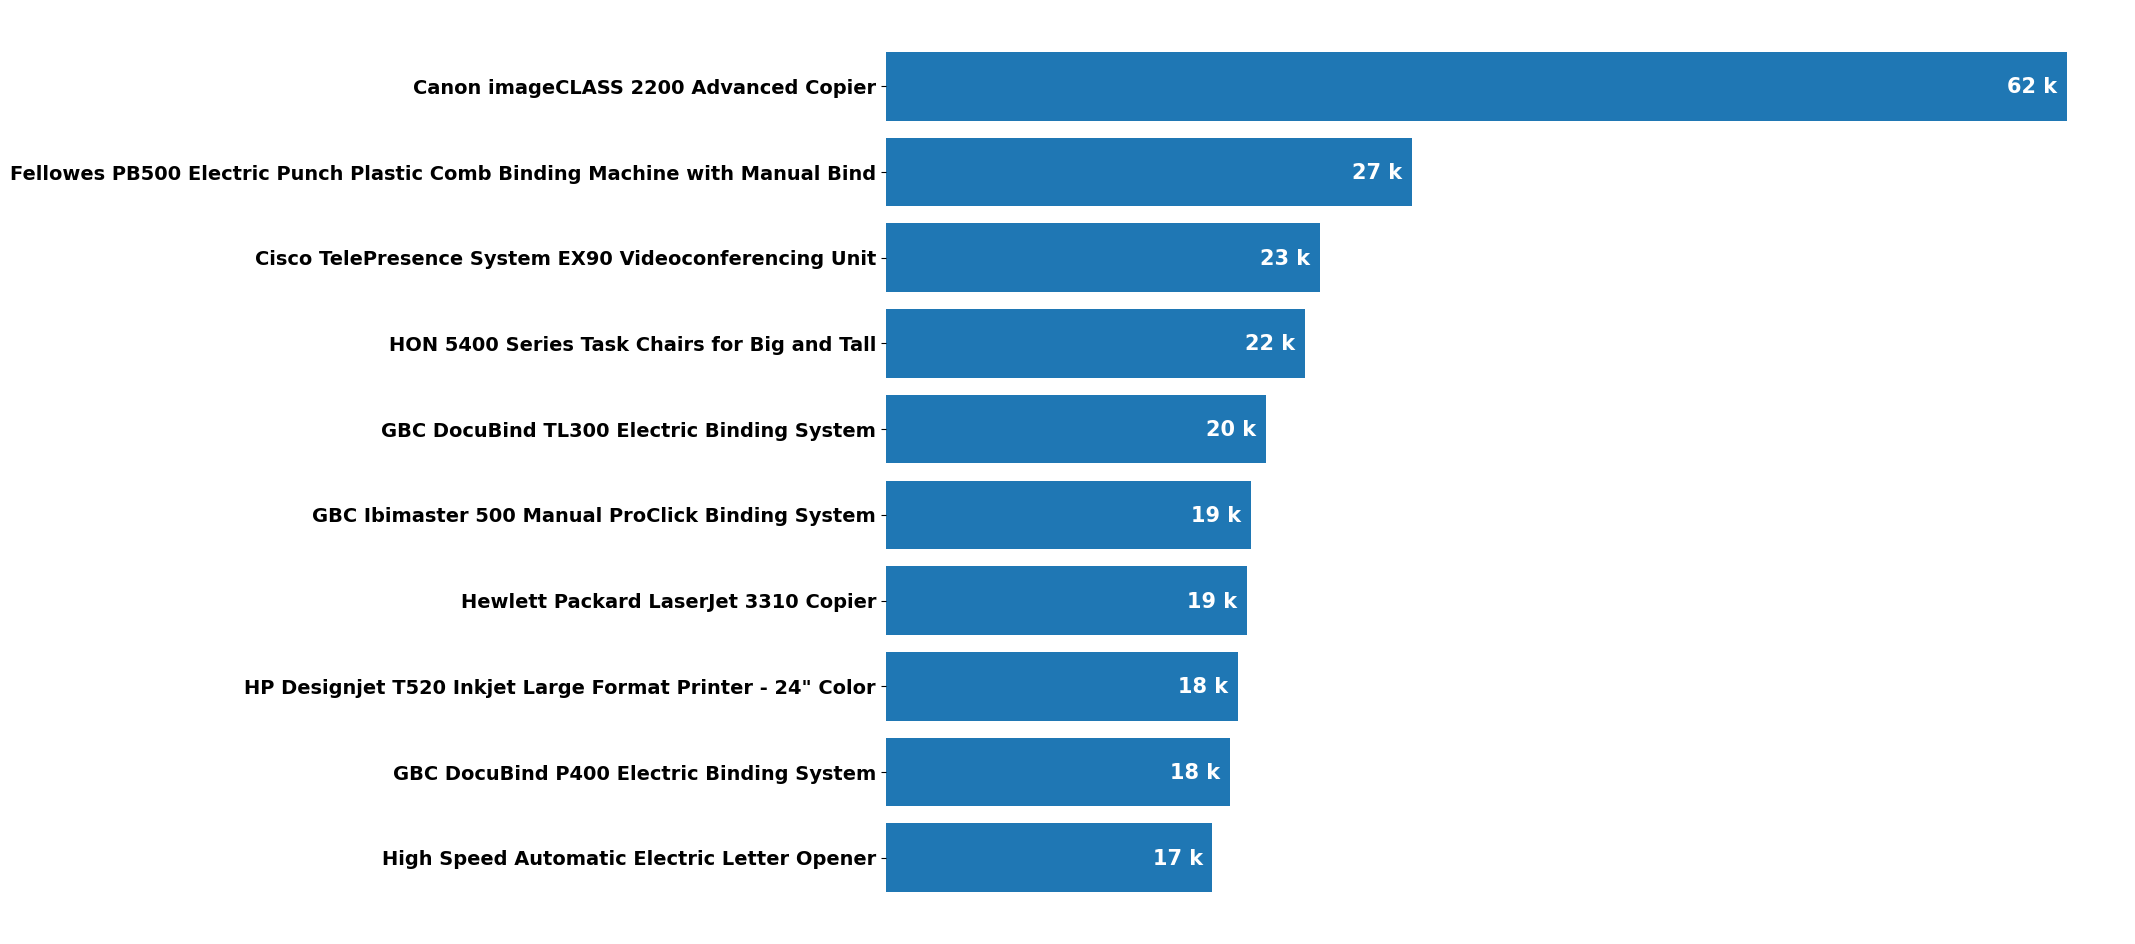

In [170]:
fig, ax = plt.subplots(figsize=(16, 12))

ax.barh(top_n_itens['Product Name'].values, #valores no eixo y
       top_n_itens.Sales.values, #valores no eixo x
        )

ax.invert_yaxis() #invertendo o eixo y

#percorrendo os label do eixo y
for label in ax.get_yticklabels():
    label.set_weight('bold') #deixando os labels em negrito

# Adicionando o rótulo dos dados
for i in range(0, n):
    ax.annotate(f'{top_n_itens.Sales.values[i] / 1000 :.0f} k', # Valores que vão ser mostrados como rótulos, já formatados
                 (top_n_itens.Sales.values[i], i), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                xytext=(-25, -5), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=15, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="white" # Cor dos rótulos
               )

ax.xaxis.set_visible(False)
ax.spines[:].set_visible(False)
ax.tick_params(axis='y', labelsize=14)
plt.show()

**Agora agrupando por ítem e ano**

In [172]:
base_df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11


In [182]:
# Podemos fazer um groupby de item e ano
itens_ano = base_df.groupby(['Product Name', 'Ano'])['Sales'].sum()
itens_ano = itens_ano.reset_index()
itens_ano

,Product Name,Ano,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2018,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2016,6.608
2,"#10 Gummed Flap White Envelopes, 100/Box",2017,24.780
3,"#10 Gummed Flap White Envelopes, 100/Box",2018,9.912
4,#10 Self-Seal White Envelopes,2017,86.502
...,...,...,...
5269,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,2018,205.086
5270,netTALK DUO VoIP Telephone Service,2015,335.936
5271,netTALK DUO VoIP Telephone Service,2016,230.956
5272,netTALK DUO VoIP Telephone Service,2017,377.928


In [187]:
# Para visualizar algum item dos top itens
itens_ano[itens_ano['Product Name'] == top_n_itens.iloc[0, 0]]

,Product Name,Ano,Sales
1163,Canon imageCLASS 2200 Advanced Copier,2017,25899.926
1164,Canon imageCLASS 2200 Advanced Copier,2018,35699.898


In [189]:
# Para visualizar algum item dos top itens
itens_ano[itens_ano['Product Name'] == top_n_itens.iloc[2, 0]]

,Product Name,Ano,Sales
1270,Cisco TelePresence System EX90 Videoconferenci...,2015,22638.48


**Como vamos criar esse gráfico? Como saber quais itens não aparecem em todos os anos?**

### Juntando bases no pandas

**O <font color='blue'>.merge()</font> irá juntar duas bases**
- Para isso, devemos passar:
    - base 1
    - base 2
    - how: forma que iremos fazer essa junção das bases
        - inner: o que tiver em comum entre as 2 bases (base 1 E base 2)
        - outer: tudo o que tiver nas 2 bases (base 1 OU base 2)
        - left: tudo o que tem na PRIMEIRA base, juntando com o que tiver na segunda
        - right: tudo o que tem na SEGUNDA base, juntando com o que tiver na primeira
    - on: colunar que vamos usar para fazer a junção da base

In [190]:
# Temos a nossa base de top itens
top_n_itens

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


**Como podemos cruzar a base com todos os anos de 2015 a 2018?**
- Basta transformar as datas em um DataFrame e usar o merge para fazer essa união

In [191]:
df_datas = pd.DataFrame([2018,2017,2016,2015])
df_datas.columns = ['Ano']
df_datas

,Ano
0,2018
1,2017
2,2016
3,2015


**Só que pra conseguir unir as bases, precisamos ter uma coluna em comum entre elas**
- Então podemos, nas duas bases, criar uma coluna chamada `uniao` (ou qualquer outro nome) com o mesmo valor

In [193]:
itens['uniao'] = 'unir'
df_datas['uniao'] = 'unir'

In [194]:
# Definindo o top n itens
n = 10
top_n_itens = itens.head(n)

In [195]:
top_n_itens

,Product Name,Sales,uniao
404,Canon imageCLASS 2200 Advanced Copier,61599.824,unir
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480,unir
785,HON 5400 Series Task Chairs for Big and Tall,21870.576,unir
685,GBC DocuBind TL300 Electric Binding System,19823.479,unir
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500,unir
804,Hewlett Packard LaserJet 3310 Copier,18839.686,unir
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,unir
682,GBC DocuBind P400 Electric Binding System,17965.068,unir
812,High Speed Automatic Electric Letter Opener,17030.312,unir


**Agora que temos uma coluna que conseguimos relacionar, podemos fazer o merge das bases**

In [200]:
produto_ano = pd.merge(
    top_n_itens, # <- primeira base
    df_datas, # <- segunda base
    how='outer', # <- tipo de junção que vamos fazer
    on="uniao" # <- coluna que vamos usar para fazer essa junção das bases
) 

produto_ano.head(2)

,Product Name,Sales,uniao,Ano
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017


#### Agora podemos voltar para a base itens_ano e fazer a junção com essa base acima

In [199]:
itens_ano.head(2)

,Product Name,Ano,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2018,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2016,6.608


In [201]:
itens_ano_grafico = pd.merge(produto_ano,
                            itens_ano,
                            how='left',
                            on=['Product Name', 'Ano'])

itens_ano_grafico.head()

,Product Name,Sales_x,uniao,Ano,Sales_y
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018,35699.898
1,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2017,25899.926
2,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2016,NaN
3,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2015,NaN
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018,7371.742


In [202]:
itens_ano_grafico[itens_ano_grafico['Ano']==2018]

,Product Name,Sales_x,uniao,Ano,Sales_y
0,Canon imageCLASS 2200 Advanced Copier,61599.824,unir,2018,35699.898
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,unir,2018,7371.742
8,Cisco TelePresence System EX90 Videoconferenci...,22638.480,unir,2018,NaN
12,HON 5400 Series Task Chairs for Big and Tall,21870.576,unir,2018,7220.094
16,GBC DocuBind TL300 Electric Binding System,19823.479,unir,2018,10943.278
20,GBC Ibimaster 500 Manual ProClick Binding System,19024.500,unir,2018,760.980
24,Hewlett Packard LaserJet 3310 Copier,18839.686,unir,2018,9239.846
28,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,unir,2018,NaN
32,GBC DocuBind P400 Electric Binding System,17965.068,unir,2018,7077.148
36,High Speed Automatic Electric Letter Opener,17030.312,unir,2018,NaN


In [207]:
itens_ano_grafico['Sales_y'].values

array([35699.898, 25899.926,       nan,       nan,  7371.742,  2287.782,
       15760.276,  2033.584,       nan,       nan,       nan, 22638.48 ,
        7220.094,  4626.468,  5257.35 ,  4766.664, 10943.278,  1793.98 ,
        1345.485,  5740.736,   760.98 , 12860.562,  5402.958,       nan,
        9239.846,  6839.886,   959.984,  1799.97 ,       nan,  8749.95 ,
             nan,  9624.945,  7077.148,  5443.96 ,       nan,  5443.96 ,
             nan,  8842.662,       nan,  8187.65 ])

**Agora podemos usar esses dados para traçar o gráfico**

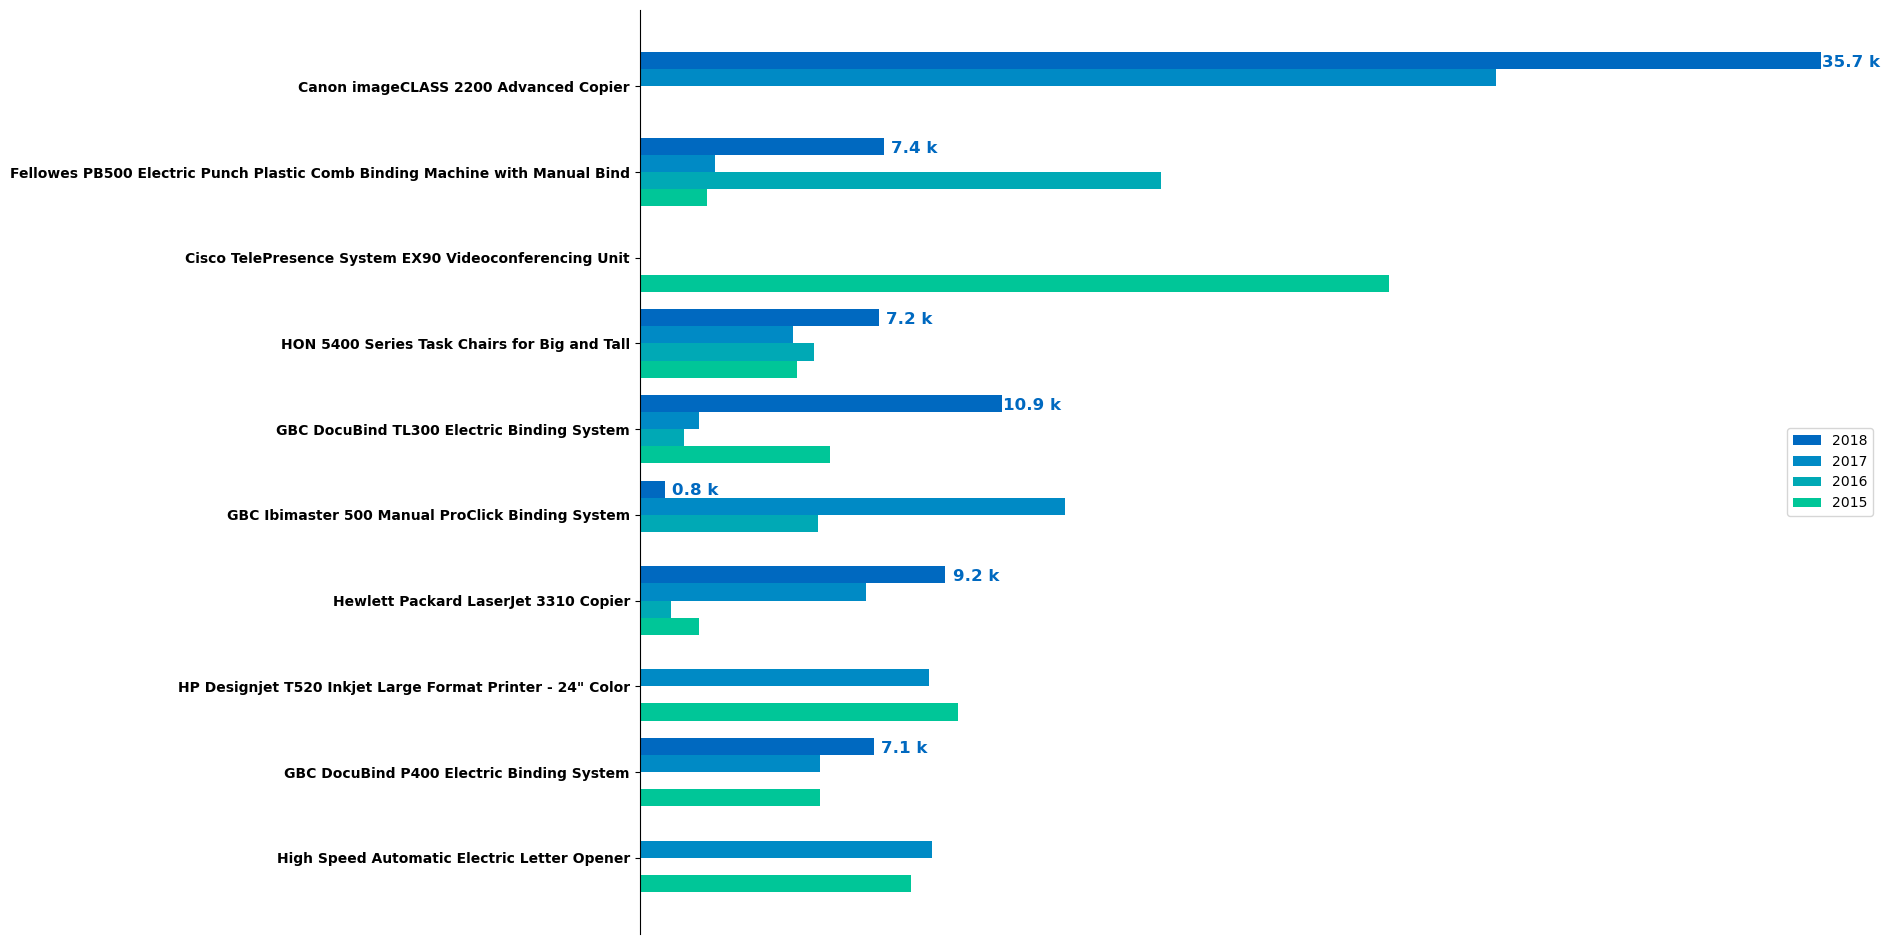

In [270]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar
fig, ax = plt.subplots(figsize=(16, 12))


hgt = 0.2

qtd_itens = len(top_n_itens) 

ax.barh(np.arange(0, qtd_itens) - hgt - hgt/2, #valores no eixo y
       itens_ano_grafico[itens_ano_grafico['Ano']==2018]['Sales_y'].values, #valores no eixo x
       label= 2018,
       height= hgt, #comprimento do gráfico
       color="#0069c0" 
       )

ax.barh(np.arange(0, qtd_itens) - hgt/2, #valores no eixo y
       itens_ano_grafico[itens_ano_grafico['Ano']==2017]['Sales_y'].values, #valores no eixo x
        label= 2017,
        height= hgt,
        color="#008ac5"
        )

ax.barh(np.arange(0, qtd_itens) + hgt/2, #valores no eixo y
       itens_ano_grafico[itens_ano_grafico['Ano']==2016]['Sales_y'].values, #valores no eixo x
        label= 2016,
        height= hgt,
        color = "#00a9b5"
        )

ax.barh(np.arange(0, qtd_itens)+ hgt + hgt/2, #valores no eixo y
       itens_ano_grafico[itens_ano_grafico['Ano']==2015]['Sales_y'].values, #valores no eixo x
        label= 2015,
        height= hgt,
        color="#00c698"
        )
ax.invert_yaxis() #invertendo o eixo y

ax.legend()

# Adicionando o rótulo dos dados
for i in range(0, qtd_itens):
    ax.annotate(f'{itens_ano_grafico[itens_ano_grafico["Ano"]==2018]["Sales_y"].values[i] / 1000:,.1f} k', # Valores que vão ser mostrados como rótulos, já formatados
                 (itens_ano_grafico[itens_ano_grafico["Ano"]==2018]["Sales_y"].values[i], i), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                xytext=(22, 14), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=12, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
               )

ax.set_yticks(np.arange(0, qtd_itens)) #ajustando os valores do eixo y
ax.set_yticklabels(top_n_itens['Product Name'].values) #colocando os rótulos
ax.tick_params(axis='y', labelsize=10) #ajustando a visualização

#deixando os rótulos em negrito
for label in ax.get_yticklabels():
    label.set_weight('bold')

ax.xaxis.set_visible(False) #retirando o eixo x

#retirando os traços dos gráficos
ax.spines[['top', 'bottom', 'right']].set_visible(False)
plt.show()

# Resumindo as perguntas

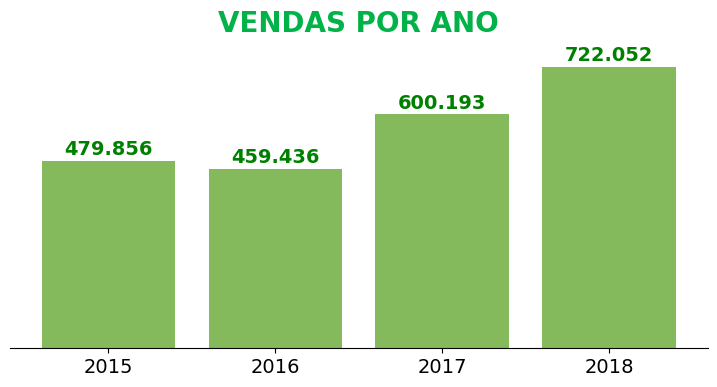

In [273]:
fig,ax = plt.subplots(
            figsize = (9,4) # Tamanho da figura
        )

soma_ano = base_df.groupby("Ano")["Sales"].sum() # Valores que vamos usar para criar o nosso gráfico

ax.bar(soma_ano.index,soma_ano.values,
       color="#84ba5b" # Cor das barras
      )

ax.set_title("VENDAS POR ANO", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Ajustando os valores de x
ax.tick_params(axis='x',labelsize=14) # Melhorando o visual do eixo x

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(soma_ano.values[i]).replace(',', '.'), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_ano.index[i],soma_ano.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,+15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="green" # Cor dos rótulos
            )
    
ax.set_yticks(np.array([0,790000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y

ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

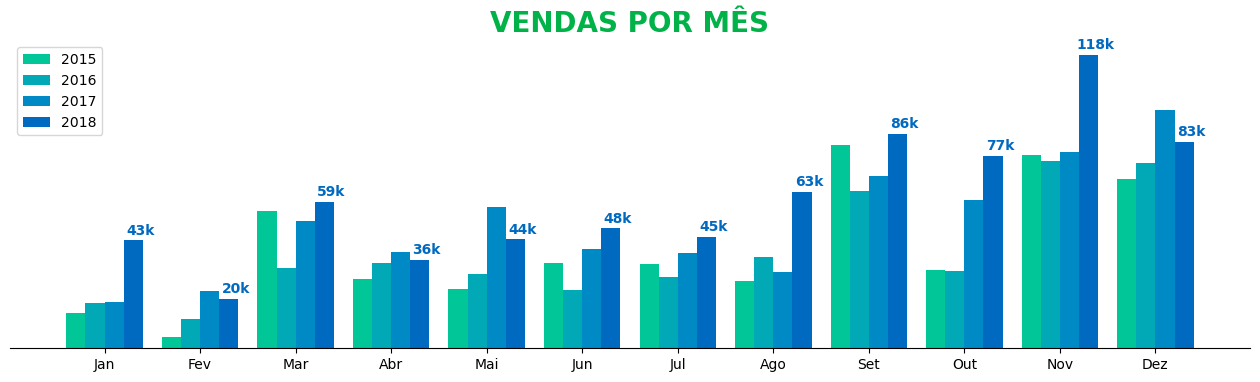

In [274]:
fig,ax = plt.subplots(
            figsize = (16,4) # Tamanho da figura
        )

ax.set_title("VENDAS POR MÊS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

wid = 0.2 # Tamanho das barras

ax.bar(soma_mes[soma_mes.Ano == 2015].Mes.values-wid-wid/2, # Ajuste da posição das barras
       soma_mes[soma_mes.Ano == 2015].Sales.values,
       color="#00c698", # Cor das barras
       label=2015, # Label dos dados
       width=wid # Largura das barras
      )
ax.bar(soma_mes[soma_mes.Ano == 2016].Mes.values-wid/2, 
       soma_mes[soma_mes.Ano == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adicionando o restante das barras
ax.bar(soma_mes[soma_mes.Ano == 2017].Mes.values+wid/2, 
       soma_mes[soma_mes.Ano == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(soma_mes[soma_mes.Ano == 2018].Mes.values+wid+wid/2, 
       soma_mes[soma_mes.Ano == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )
ax.legend()

# Adicionando o rótulo dos dados para 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(soma_mes[soma_mes.Ano == 2018].Sales.values[i]/1000), # Valores que vão ser mostrados como rótulos, já formatados
                (soma_mes[soma_mes.Ano == 2018].Mes.values[i]+wid+wid/2,soma_mes[soma_mes.Ano == 2018].Sales.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(5,12), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=10, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
            )

ax.set_yticks(np.array([0,97000])) # Diminuindo o tamanho das barras para não cortar o rótulo
ax.yaxis.set_visible(False) # Retirando os valores do eixo y
    
ax.spines['top'].set_visible(False) # Retirando os traços do gráfico
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']) # Colocando rótulo no meu eixo
ax.tick_params(axis='x',labelsize=10) # Melhorando o visual do eixo x

plt.show()

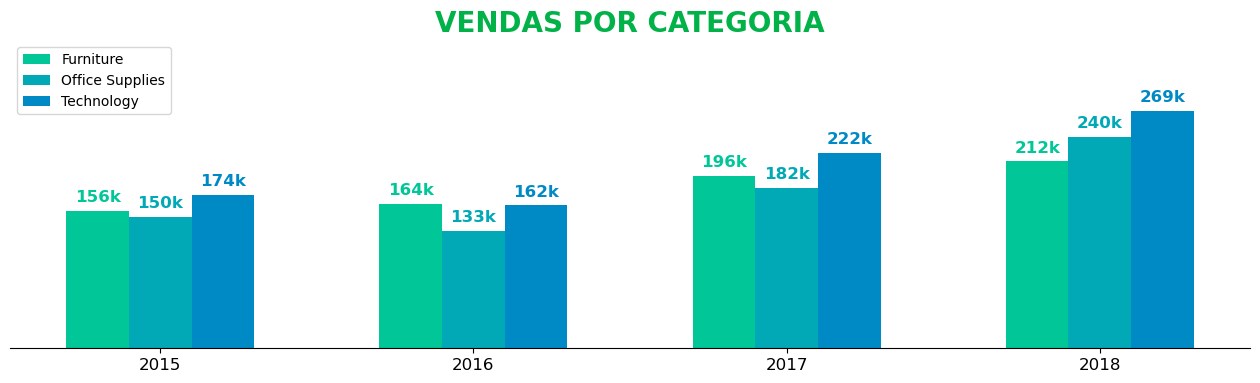

In [275]:
fig,ax = plt.subplots(
            figsize = (16,4)
        )

ax.set_title("VENDAS POR CATEGORIA", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

wid = 0.2 

ax.bar(categoria[categoria.Category == 'Furniture'].Ano.values-wid, # Como temos 3 colunas, vamos deslocar a largura da coluna inteira
       categoria[categoria.Category == 'Furniture'].Sales.values,
       color="#00c698", 
       label='Furniture', # As legendas agora serão as categorias
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Office Supplies'].Ano.values, 
       categoria[categoria.Category == 'Office Supplies'].Sales.values,
       color="#00a9b5", 
       label='Office Supplies', 
       width=wid
      )

ax.bar(categoria[categoria.Category == 'Technology'].Ano.values+wid, 
       categoria[categoria.Category == 'Technology'].Sales.values,
       color="#008ac5", 
       label='Technology', 
       width=wid
      )

ax.legend()

for i in np.arange(0,4):
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Furniture'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Furniture'].Ano.values[i]-wid,categoria[categoria.Category == 'Furniture'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00c698")
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Office Supplies'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Office Supplies'].Ano.values[i],categoria[categoria.Category == 'Office Supplies'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#00a9b5")
    ax.annotate('{:,.0f}k'.format(categoria[categoria.Category == 'Technology'].Sales.values[i]/1000), 
                (categoria[categoria.Category == 'Technology'].Ano.values[i]+wid,categoria[categoria.Category == 'Technology'].Sales.values[i]), 
                ha="center", va="top", xytext=(0,15), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="#008ac5")   
    
ax.set_yticks(np.array([0,350000]))
ax.yaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(2015,2019)) 
ax.tick_params(axis='x',labelsize=12) 

plt.show()

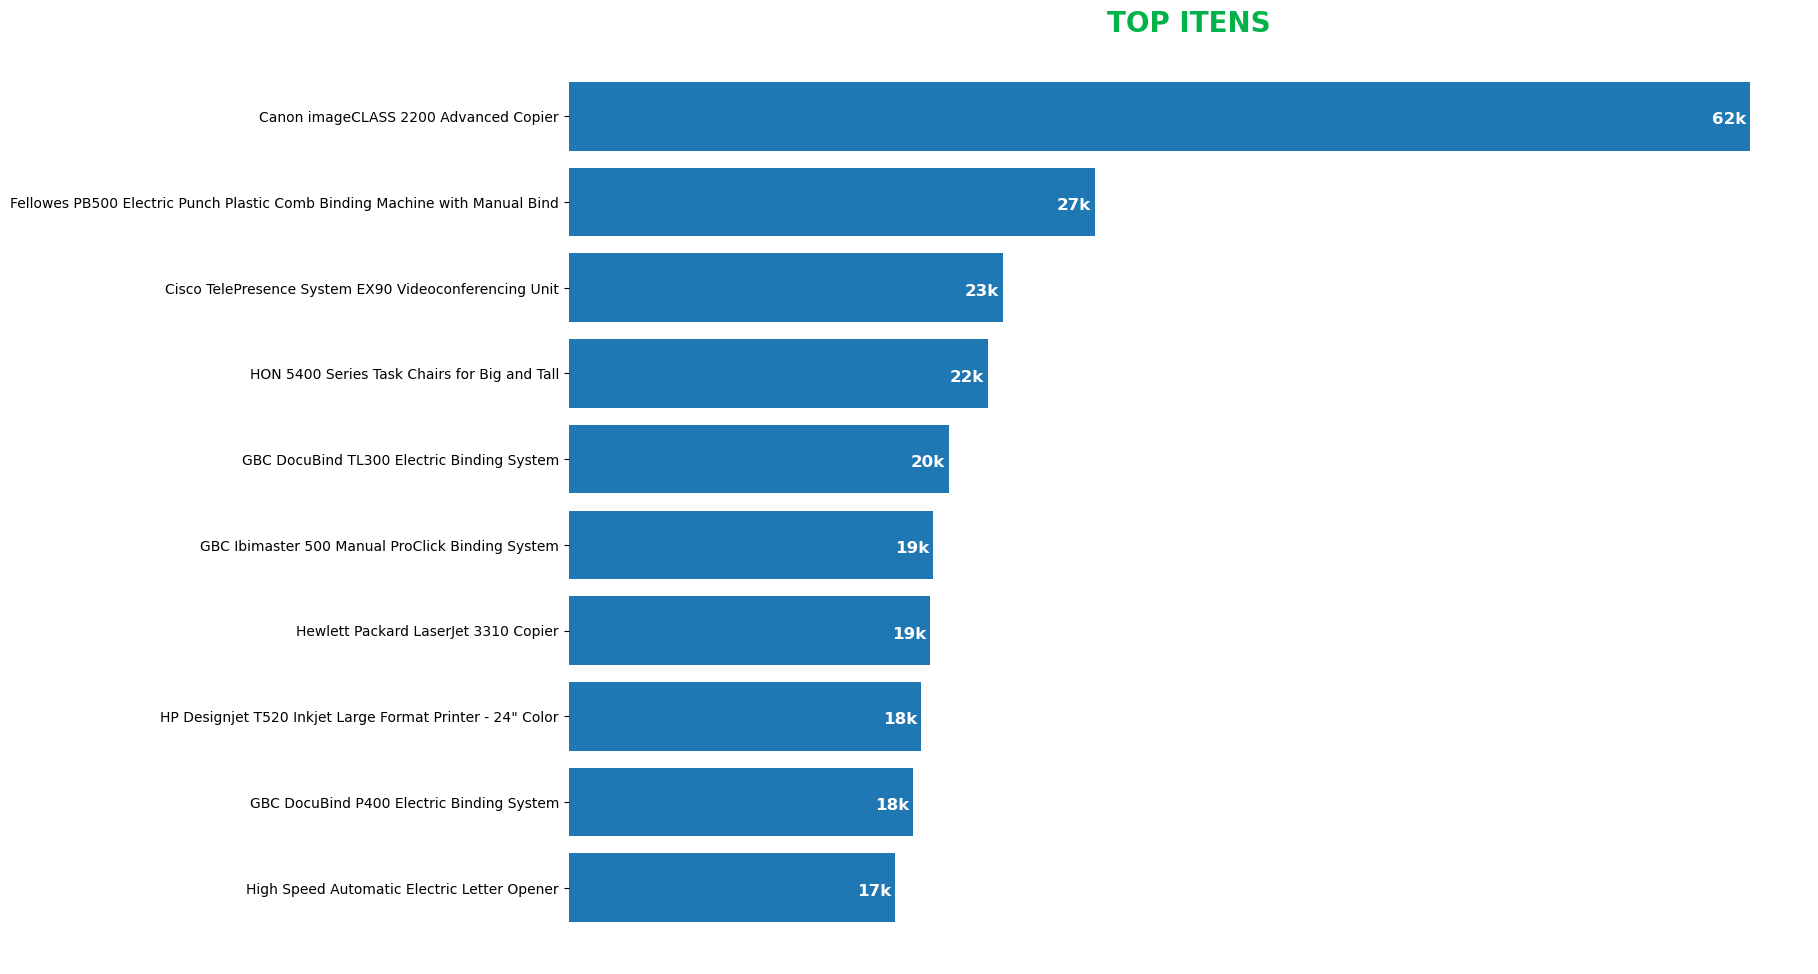

In [276]:
fig,ax = plt.subplots(
            figsize = (16,12)
        )

ax.set_title("TOP ITENS", # Título do gráfico
             fontsize=20, # Tamanho da fonte
             fontweight='bold', # Espessura da fonte
             color='#00b247' # Cor da fonte
            )

ax.barh(top_n_itens['Product Name'].values, #Valores de y
        top_n_itens['Sales'].values, # Valores de x 
        align='center')

ax.invert_yaxis() # Inverter o eixo y (deixando o gráfico do maior para o menor)

for i in np.arange(0,n):
    ax.annotate('{:,.0f}k'.format(top_n_itens['Sales'].values[i]/1000), 
                (top_n_itens['Sales'].values[i],i), 
                ha="center", va="top", xytext=(-15,3), textcoords="offset points", 
                fontsize=12, fontweight='bold', color="white")
    
ax.xaxis.set_visible(False) 

ax.spines['top'].set_visible(False) 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

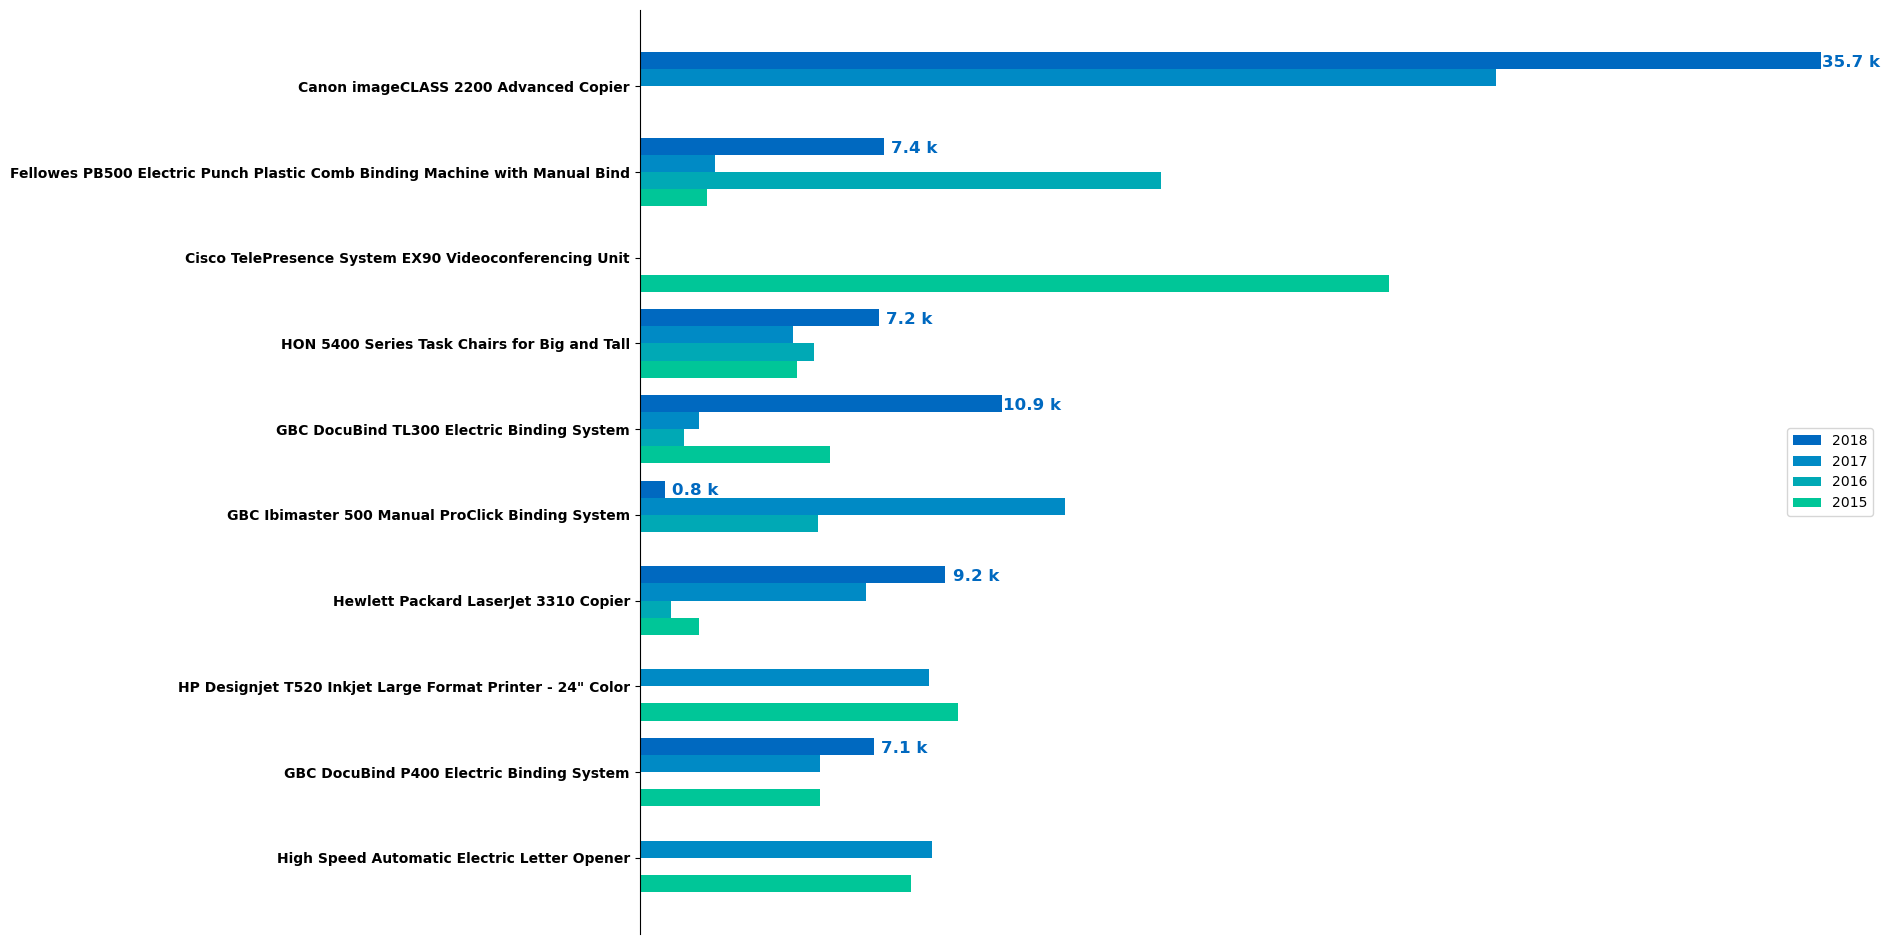

In [278]:
# Vamos criar o gráfico baseado nesse DataFrame que acabamos de criar
fig, ax = plt.subplots(figsize=(16, 12))


hgt = 0.2

qtd_itens = len(top_n_itens) 

ax.barh(np.arange(0, qtd_itens) - hgt - hgt/2, #valores no eixo y
       itens_ano_grafico[itens_ano_grafico['Ano']==2018]['Sales_y'].values, #valores no eixo x
       label= 2018,
       height= hgt, #comprimento do gráfico
       color="#0069c0" 
       )

ax.barh(np.arange(0, qtd_itens) - hgt/2, #valores no eixo y
       itens_ano_grafico[itens_ano_grafico['Ano']==2017]['Sales_y'].values, #valores no eixo x
        label= 2017,
        height= hgt,
        color="#008ac5"
        )

ax.barh(np.arange(0, qtd_itens) + hgt/2, #valores no eixo y
       itens_ano_grafico[itens_ano_grafico['Ano']==2016]['Sales_y'].values, #valores no eixo x
        label= 2016,
        height= hgt,
        color = "#00a9b5"
        )

ax.barh(np.arange(0, qtd_itens)+ hgt + hgt/2, #valores no eixo y
       itens_ano_grafico[itens_ano_grafico['Ano']==2015]['Sales_y'].values, #valores no eixo x
        label= 2015,
        height= hgt,
        color="#00c698"
        )
ax.invert_yaxis() #invertendo o eixo y

ax.legend()

# Adicionando o rótulo dos dados
for i in range(0, qtd_itens):
    ax.annotate(f'{itens_ano_grafico[itens_ano_grafico["Ano"]==2018]["Sales_y"].values[i] / 1000:,.1f} k', # Valores que vão ser mostrados como rótulos, já formatados
                 (itens_ano_grafico[itens_ano_grafico["Ano"]==2018]["Sales_y"].values[i], i), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                xytext=(22, 14), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=12, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
                color="#0069c0" # Cor dos rótulos
               )

ax.set_yticks(np.arange(0, qtd_itens)) #ajustando os valores do eixo y
ax.set_yticklabels(top_n_itens['Product Name'].values) #colocando os rótulos
ax.tick_params(axis='y', labelsize=10) #ajustando a visualização

#deixando os rótulos em negrito
for label in ax.get_yticklabels():
    label.set_weight('bold')

ax.xaxis.set_visible(False) #retirando o eixo x

#retirando os traços dos gráficos
ax.spines[['top', 'bottom', 'right']].set_visible(False)
plt.show()

### EXTRA: E se quisermos outros tipos de gráficos?